# Lecture 1 and 2: Introduction and Data-driven Image Classification

Welcome to this first hands-on tutorial! In this notebook, we’ll explore how to train a neural network for image classification using **PyTorch**, a popular deep learning framework. Our dataset of choice is the **CIFAR-10 dataset**, a well-known collection of 60,000 color images (32x32 pixels each) across 10 categories, such as airplanes, cats, and cars. Each category contains 6,000 images, providing a rich dataset for learning.

For this task, we will build a **Multi-Layer Perceptron (MLP)**, a foundational type of artificial neural network. An MLP consists of:

- **Input Layer**: Processes the raw image data.
- **Hidden Layers**: Extract meaningful patterns and features.
- **Output Layer**: Maps the learned features to one of the 10 image classes.

The connections between nodes in these layers are weighted, and the network learns to adjust these weights during training to improve classification accuracy.

By the end of this notebook, you’ll understand how to:
1. Preprocess image data for neural network training.
2. Build and train an MLP using PyTorch.
3. Evaluate the performance of the trained model.

Let’s dive in and start building!

### Step 1: Import libraries and load the CIFAR-10 dataset

In this step, we’ll prepare our tools and data to kickstart the project. First, we’ll import the necessary libraries that make it possible to handle data, build and train neural networks, and visualize results effectively. 

Next, we’ll load the **CIFAR-10 dataset** using `torchvision`. As a quick refresher, the CIFAR-10 dataset contains 60,000 color images (32x32 pixels) evenly distributed across 10 classes (e.g., airplanes, cats, and cars). Each class has 6,000 images, providing a balanced and diverse dataset for training.

To ensure optimal model performance, we’ll also **normalize** the images. Normalization scales the pixel values of the images to a similar range, typically around 0, making it easier for the model to learn and speeding up the convergence process during training.

In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torchvision.transforms import (
    Compose,
    ToTensor,
    Normalize,
)

In [2]:
transform = Compose([
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_dataset = CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=transform
)
train_dataloader = DataLoader(
    train_dataset,
    batch_size=10,
    shuffle=True, 
    num_workers=2
)

test_dataset = CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=transform
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=10,
    shuffle=False, 
    num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Now, let’s take a moment to **visualize some images from our dataset**. This is a crucial step to better understand the data we’ll be working with. By examining these images, we can gain insights into the patterns, textures, and challenges involved in classifying them correctly. This also helps us appreciate the complexity of the task our model will tackle as it learns to distinguish between the 10 diverse classes in CIFAR-10.

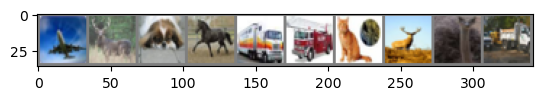

plane  deer   dog horse truck truck   cat  deer  bird truck


In [10]:
def imshow(img):
    img = img / 2 + 0.5     # undo normalization
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

# get some random training images
train_iterator = iter(train_dataloader)
images, labels = next(train_iterator)

# show images
imshow(make_grid(images, nrow=10))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

In [3]:
torch.cuda.is_available()
print(torch.cuda.device_count())

1


### Step 2: Define a simple Multi-Layer Perceptron (MLP)

Next, we’ll design a simple **Multi-Layer Perceptron (MLP)** to perform image classification on the CIFAR-10 dataset. An MLP is a foundational type of artificial neural network that uses multiple layers to learn patterns in data.

An MLP consists of:
- **Input Layer**: Receives the raw input data (in our case, (normalized) image pixels).
- **Hidden Layers**: Learn meaningful features by transforming input data through weighted connections and activation functions.
- **Output Layer**: Maps the learned features to specific classes (10 in this case).

Each node (or neuron) in one layer is connected to every node in the next layer through a weighted connection, allowing the network to capture complex relationships in the data.

In [4]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # TODO: Define your own layers
        self.fc1 = nn.Linear(32*32*3, 120)  # replace with your implementation (make sure the input layer is compatible with the CIFAR-10 images with a size of 32*32*3)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # replace with your implementation (make sure the output layer is compatible with the number of classes (n=10) in CIFAR-10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)  # flatten the images
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = MLP()


### Step 3: Define a loss function and optimizer  

In this step, we’ll define two key components of our model training process: the **loss function** and the **optimizer**.  

- The **loss function** quantifies the difference between the model's predictions and the true labels. It provides feedback that guides the model on how to improve its predictions. For our classification task, we’ll use **Cross Entropy Loss**, which is well-suited for multi-class problems like CIFAR-10.  

- The **optimizer** is responsible for adjusting the model’s parameters (weights and biases) to minimize the loss function. We’ll use **Stochastic Gradient Descent (SGD)**, a widely-used optimization algorithm that updates parameters incrementally during training to improve performance.  

Together, these tools will enable our model to learn effectively from the data and improve its accuracy over time.

In [5]:
# Define your own loss function
def my_loss_function(outputs, labels):
    # Implement your own version of CrossEntropyLoss
    # Hint: CrossEntropyLoss is a combination of LogSoftmax and NLLLoss
    # You might want to use torch.log and torch.exp functions

    # Calculate softmax of the outputs
    softmax_outputs = torch.exp(outputs) / torch.sum(torch.exp(outputs), dim=1, keepdim=True)
    # Calculate negative log likelihood
    neg_log_likelihood = -torch.log(softmax_outputs[range(labels.shape[0]), labels])

    # TODO: Complete the implementation by averaging the negative log likelihood across the batch to get the final loss
    avg_neg_log_likelihood = torch.mean(neg_log_likelihood)

    return avg_neg_log_likelihood


criterion = my_loss_function
optimizer = SGD(net.parameters(), lr=0.001, momentum=0.9)

### Step 4: Train the network and visualize the loss  

Now, it’s time to train our neural network. **Training** involves optimizing the model’s parameters (weights and biases) to minimize the loss function, allowing the network to make better predictions over time.  

The training process consists of the following key steps:  
1. **Forward Pass**: The training data is passed through the network, and predictions are generated.  
2. **Loss Calculation**: The difference between the model’s predictions and the true labels is measured using the loss function.  
3. **Backward Pass**: Gradients of the loss with respect to each parameter are calculated through backpropagation, allowing the model to learn how to adjust its parameters.  
4. **Parameter Update**: The optimizer updates the model’s parameters in the direction that reduces the loss, using the gradients calculated in the backward pass.  

We’ll repeat this process for several **epochs** (complete passes through the training data). After each epoch, we’ll visualize the loss to track how well the network is learning. A decreasing loss indicates that the model is improving its predictions.

In [7]:
loss_values = []  # to store loss values
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        # print(net)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # add the loss to running_loss
        running_loss += loss.item()

    # calculate average loss for this epoch
    avg_loss = running_loss / len(train_dataloader)
    print('Epoch [%d] loss: %.3f' % (epoch + 1, avg_loss))
    loss_values.append(avg_loss)  # store the loss value

print('Finished Training')

Epoch [1] loss: 1.536
Epoch [2] loss: 1.415
Epoch [3] loss: 1.338
Epoch [4] loss: 1.272
Epoch [5] loss: 1.223
Epoch [6] loss: 1.176
Epoch [7] loss: 1.135
Epoch [8] loss: 1.096
Epoch [9] loss: 1.065
Epoch [10] loss: 1.029
Epoch [11] loss: 1.000
Epoch [12] loss: 0.970
Epoch [13] loss: 0.944
Epoch [14] loss: 0.918
Epoch [15] loss: 0.892
Epoch [16] loss: 0.870
Epoch [17] loss: 0.847
Epoch [18] loss: 0.825
Epoch [19] loss: 0.806
Epoch [20] loss: 0.783
Epoch [21] loss: 0.761
Epoch [22] loss: 0.750
Epoch [23] loss: 0.726
Epoch [24] loss: 0.708
Epoch [25] loss: 0.691
Epoch [26] loss: 0.679
Epoch [27] loss: 0.658
Epoch [28] loss: 0.642
Epoch [29] loss: 0.630
Epoch [30] loss: 0.612
Epoch [31] loss: 0.605
Epoch [32] loss: 0.592
Epoch [33] loss: 0.579
Epoch [34] loss: 0.557
Epoch [35] loss: 0.554
Epoch [36] loss: 0.539
Epoch [37] loss: 0.527
Epoch [38] loss: 0.511
Epoch [39] loss: 0.503
Epoch [40] loss: 0.495
Finished Training


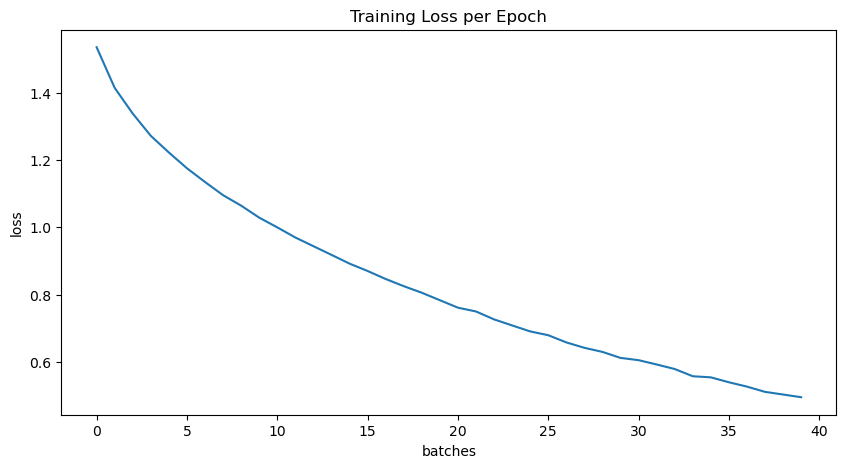

In [8]:
plt.figure(figsize=(10,5))
plt.title("Training Loss per Epoch")
plt.plot(loss_values)
plt.xlabel("batches")
plt.ylabel("loss")
plt.show()

### Step 5: Test the network on test data and visualize the results  

Finally, we’ll evaluate our trained network on the test dataset to see how well it performs on data it hasn’t encountered during training. Testing involves feeding the test data through the network and observing how accurately it classifies the images.  

We’ll also visualize some test images alongside the model’s predictions. This simple but powerful step helps us understand the network’s strengths and weaknesses by identifying patterns it correctly classifies and areas where it might struggle.  

By observing the predictions, we can gain valuable insights into the network’s performance and how well it has learned the CIFAR-10 classes.

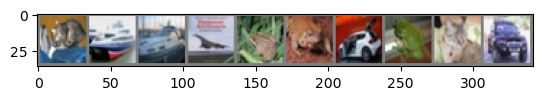

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:    cat  ship horse horse  frog  bird   car  frog  deer   car


In [12]:
test_iterator = iter(test_dataloader)
images, labels = next(test_iterator)

# print images
imshow(make_grid(images, nrow=10))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))